In [1]:
#How can K-Fold-Validation be used to search for an optimal tuning paramter
#How can this proces be made more efficient
#How do u search for multiple tunning parameters at once
#what do u do with those tunning parameters before making real predicitions
#How can the computational expense of this process be reduced



In [2]:
#Review of K-Fold Cross Validation
#Steps for cross validation
    #Dataset is split into k folds of equal size (normally its 10)
        #the model is trained on all of the folds except 1 and then tested on the remaining fold
        #and evaluated using the chosen evaluation method
        #this process is done k-1 such that each fold is the testing set once
        #and training set all other times
    #Each fold acts as the testing set 1 time and acts as the training set k-1 times
    #Average testing performance (Cross Validated Performance) is used as the estimate of out - of - sample performance
    
#Benefits of cross validation
    #More reliable estimate of out of sample performance than train split
        #bse cross validation reduces the variance associated with single trial of train test split
    #Can be used for selecting tunning parameters, choosing between models, and selecting features
    
#Drawbacks of cross - validation
    #Can be computationally expensive, especially when the data set is very large
    
    

In [4]:
#Review of parameter tunning using cross_val_score
#Goal: Select the best tunning parameters (hyperparameters) for knn on the iris dataset
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
iris = load_iris()
X = iris.data
y = iris.target


In [9]:
# 10 fold cross validation with k = 5 for knn
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [10]:
#use average accuracy as an estimate of out of sample accuracy
print(scores.mean())

0.9666666666666668


In [11]:
#search for an optimal value of k for knn
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross Validated Accuracy')

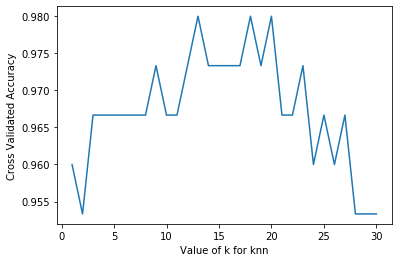

In [12]:
#plot the value of k for knn (x-axis) versus the cross validated accuracy (y - axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of k for knn')
plt.ylabel('Cross Validated Accuracy')

In [13]:
#we see k value 13, 18 20 be the best
#it would be better if the above process could be automated
#thats we have GridSearchCV was created
#allows you to define a grid of parameters that will be searched using k-fold cross validation
#it replaces for loop above and provides additional functionalites

from sklearn.grid_search import GridSearchCV

ModuleNotFoundError: No module named 'sklearn.grid_search'

In [ ]:
#define the parameter values that should be searched
k_range = range(1,31)
print(k_range)


In [ ]:
#Create a parameter grid: map the paramter names to the values that should be searched
param_grid = dict(n_neighbors = k_range)
print(param_grid)

In [ ]:
#instantiate the grid
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
#this doesnt store X and y paramters,
#here it will repeat 30 times cross validation

In [ ]:
#fit the grid with data
grid.fit(X, y)



In [ ]:
#view the complete results (list of named tuples)
grid.grid_scores_
#if std is high, then it means, cross validation isnt reliable



In [ ]:
#examine first tuple
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)


In [ ]:
#Create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)


In [ ]:
#plot the results 
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross - Validated Accuracy')


In [ ]:
#Examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)


In [ ]:
#Too Complex for me, i have skipped